In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/handgestures-right/Dataset/OkTest/oktest_56.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_93.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_29.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_89.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_75.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_18.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_63.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_59.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_81.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_34.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_78.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_14.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_31.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_47.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_9.png
/kaggle/input/handgestures-right/Dataset/OkTest/oktest_65.png
/kaggle/i

In [4]:
import time

# Function to measure inference time for a model
def measure_inference_time(model, test_images):
    start_time = time.time()
    predictions = model.predict(test_images)
    end_time = time.time()
    return end_time - start_time

In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Function to load gesture images
def load_images(root_folder, gesture_folders, num_images_per_gesture):
    images = []
    labels = []
    for gesture_folder in gesture_folders:
        folder_path = os.path.join(root_folder, gesture_folder)
        for i in range(1, num_images_per_gesture + 1):
            image_path = os.path.join(folder_path, f"{gesture_folder.lower()}_{i}.png")
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                image = cv2.resize(image, (100, 100))  # Resize image
                images.append(image)
                labels.append(gesture_folder)
    return images, labels

# Load gesture images and labels for training dataset
train_gesture_folders = ["Blank", "Fist", "Ok", "Palm", "ThumbsDown", "ThumbsUp"]
num_images_per_gesture_train = 1000
root_folder_train = "/kaggle/input/handgestures-right/Dataset/"
train_images, train_labels = load_images(root_folder_train, train_gesture_folders, num_images_per_gesture_train)

# Load gesture images and labels for testing dataset
test_gesture_folders = ["BlankTest", "FistTest", "OkTest", "PalmTest", "ThumbsDownTest", "ThumbsUpTest"]
num_images_per_gesture_test = 100
root_folder_test = "/kaggle/input/handgestures-right/Dataset/"
test_images, test_labels = load_images(root_folder_test, test_gesture_folders, num_images_per_gesture_test)

# Convert images and labels to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Preprocess the images: normalize and reshape
train_images = train_images.astype("float") / 255.0
train_images = np.expand_dims(train_images, axis=-1)  # Add channel dimension
test_images = test_images.astype("float") / 255.0
test_images = np.expand_dims(test_images, axis=-1)  # Add channel dimension

# Convert labels to one-hot encoding
label_dict = {label: i for i, label in enumerate(train_gesture_folders)}
train_labels = [label_dict[label] for label in train_labels]
train_labels = to_categorical(train_labels)

label_dict_test = {label: i for i, label in enumerate(test_gesture_folders)}
test_labels = [label_dict_test[label] for label in test_labels]
test_labels = to_categorical(test_labels)

# Split the training dataset for validation
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

# Define the CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(100, 120, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(6, activation="softmax")  # Output layer with 6 classes
])

# Compile the CNN model
model_cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the CNN model
model_cnn.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

# Evaluate the CNN model
loss_cnn, accuracy_cnn = model_cnn.evaluate(test_images, test_labels)
print(f"CNN Model - Loss: {loss_cnn}, Accuracy: {accuracy_cnn}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 16640, but received input with shape (None, 12800)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 100, 100, 1), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Measure inference time for CNN
cnn_inference_time = measure_inference_time(model_cnn, test_images)
print(f"Inference time for CNN: {cnn_inference_time} seconds")

In [ ]:
# Save entire model (optional)
model_cnn.save('/kaggle/working/model_cnn.h5')

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply Data Augmentation to Training Images
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)

# Deeper Network with Regularization
model_cnn_aug = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(100, 120, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation="relu"),  # Additional Convolutional Layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(6, activation="softmax")
])

# Compile the CNN model
model_cnn_aug.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the CNN model with Data Augmentation
model_cnn_aug.fit(train_generator, epochs=10, steps_per_epoch=len(train_images)//32, validation_data=(val_images, val_labels))

# Evaluate the CNN model
loss_cnn_aug, accuracy_cnn_aug = model_cnn.evaluate(test_images, test_labels)
print(f"Modified CNN Model with data augmentation - Loss: {loss_cnn_aug}, Accuracy: {accuracy_cnn_aug}")


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 5120, but received input with shape (None, 4096)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 100, 100, 1), dtype=float32)
  • training=True
  • mask=None

In [8]:
# Measure inference time for CNN
cnn_inference_time_aug = measure_inference_time(model_cnn_aug, test_images)
print(f"Inference time for CNN: {cnn_inference_time_aug} seconds")

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 5120, but received input with shape (32, 4096)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 100, 100, 1), dtype=float32)
  • training=False
  • mask=None

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

print("Evaluation metrics of MobileNet model with data augmentation")
print(f"Modified CNN Model with Data Augmentation - Loss: {loss_cnn_aug}, Accuracy: {accuracy_cnn_aug}")

# 1. Precision, Recall, and F1-Score
y_pred = model_cnn_aug.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# # 2. Confusion Matrix
# conf_mat = confusion_matrix(y_true, y_pred_classes)
# print("Confusion Matrix:")
# print(conf_mat)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Evaluation metrics of MobileNet model with data augmentation


NameError: name 'loss_cnn_aug' is not defined

In [10]:
# Save entire model (optional)
model_cnn_aug.save('/kaggle/working/model_cnn_aug.h5')

In [11]:
import matplotlib.pyplot as plt

# Train the MobileNet model
history = model_cnn_aug.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy(CNN)')
plt.legend()
plt.show()

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 5120, but received input with shape (None, 4096)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 100, 100, 1), dtype=float32)
  • training=True
  • mask=None

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

print("Evaluation metrics of CNN model with data augmentation")
print(f"Modified CNN Model with data augmentation - Loss: {loss_cnn_aug}, Accuracy: {accuracy_cnn_aug}")
# 1. Precision, Recall, and F1-Score
y_pred = model_cnn.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# 2. Confusion Matrix
# conf_mat = confusion_matrix(y_true, y_pred_classes)
# print("Confusion Matrix:")
# print(conf_mat)

# Plot Confusion Matrix
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Evaluation metrics of CNN model with data augmentation


NameError: name 'loss_cnn_aug' is not defined

In [13]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications import MobileNet
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import img_to_array, array_to_img

# Function to load and preprocess gesture images
def load_and_preprocess_images(root_folder, gesture_folders, num_images_per_gesture, target_size=(224, 224)):
    images = []
    labels = []
    for gesture_folder in gesture_folders:
        folder_path = os.path.join(root_folder, gesture_folder)
        for i in range(1, num_images_per_gesture + 1):
            image_path = os.path.join(folder_path, f"{gesture_folder.lower()}_{i}.png")
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            if image is not None:
                image = cv2.resize(image, target_size)  # Resize image
                image = img_to_array(image)  # Convert image to array
                image /= 255.0  # Normalize image
                images.append(image)
                labels.append(gesture_folder)
    return np.array(images), np.array(labels)

# Load and preprocess gesture images and labels for training dataset
train_gesture_folders = ["Blank", "Fist", "Ok", "Palm", "ThumbsDown", "ThumbsUp"]
num_images_per_gesture_train = 1000
root_folder_train = "/kaggle/input/handgestures-right/Dataset/"
train_images, train_labels = load_and_preprocess_images(root_folder_train, train_gesture_folders, num_images_per_gesture_train)

# Load and preprocess gesture images and labels for testing dataset
test_gesture_folders = ["BlankTest", "FistTest", "OkTest", "PalmTest", "ThumbsDownTest", "ThumbsUpTest"]
num_images_per_gesture_test = 100
root_folder_test = "/kaggle/input/handgestures-right/Dataset/"
test_images, test_labels = load_and_preprocess_images(root_folder_test, test_gesture_folders, num_images_per_gesture_test)

# Convert labels to one-hot encoding
label_dict = {label: i for i, label in enumerate(train_gesture_folders)}
train_labels = [label_dict[label] for label in train_labels]
train_labels = to_categorical(train_labels)

label_dict_test = {label: i for i, label in enumerate(test_gesture_folders)}
test_labels = [label_dict_test[label] for label in test_labels]
test_labels = to_categorical(test_labels)

# Split the training dataset for validation
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

# Define the MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)
model_mobilenet = Model(inputs=base_model.input, outputs=predictions)

# Compile the MobileNet model
model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the MobileNet model
model_mobilenet.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

# Evaluate the MobileNet model
loss_mobilenet, accuracy_mobilenet = model_mobilenet.evaluate(test_images, test_labels)
print(f"MobileNet Model - Loss: {loss_mobilenet}, Accuracy: {accuracy_mobilenet}")


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
  2/132 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.4453 - loss: 1.4108   

I0000 00:00:1716312995.028805      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


132/132 ━━━━━━━━━━━━━━━━━━━━ 58s 216ms/step - accuracy: 0.9514 - loss: 0.1276 - val_accuracy: 0.4194 - val_loss: 9.4904
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9880 - loss: 0.0564 - val_accuracy: 0.9817 - val_loss: 0.0766
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9928 - loss: 0.0135 - val_accuracy: 0.7489 - val_loss: 2.6626
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9907 - loss: 0.0653 - val_accuracy: 0.9978 - val_loss: 0.0154
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9938 - loss: 0.0345 - val_accuracy: 0.9994 - val_loss: 4.9877e-04
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 1.0000 - loss: 3.0870e-05 - val_accuracy: 1.0000 - val_loss: 2.5021e-06
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 1.0000 - loss: 9.6703e-05 - val_accuracy: 1.0000 - val_loss: 1.2809e-05
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9900 - loss:

In [14]:
# Measure inference time for MobileNet
mobilenet_inference_time = measure_inference_time(model_mobilenet, test_images)
print(f"Inference time for MobileNet: {mobilenet_inference_time} seconds")

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step
Inference time for MobileNet: 4.665395975112915 seconds


In [16]:
# Save entire model (optional)
model_mobilenet.save('/kaggle/working/model_mobilenet.h5')

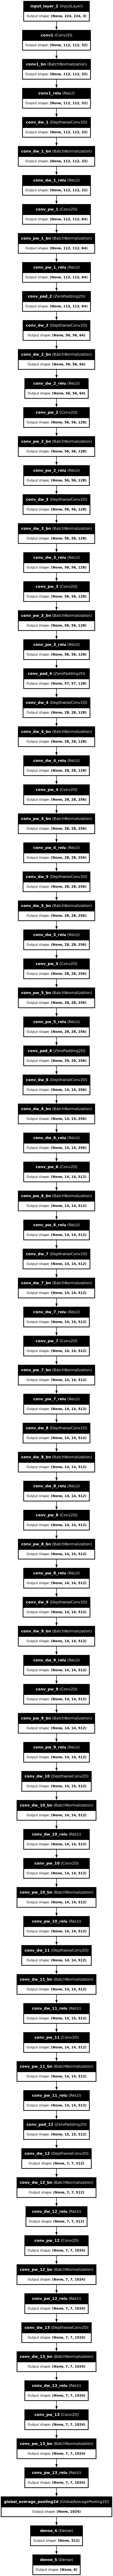

In [17]:
from keras.utils import plot_model

plot_model(model_mobilenet, to_file='model.png', show_shapes=True, show_layer_names=True)

In [18]:
from IPython.display import FileLink

# Create a link to download the model.png file
FileLink(r'model.png')


/kaggle/working/model.png

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for Training Images
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply Data Augmentation to Training Images
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)

# Define the MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)
model_mobilenet_aug = Model(inputs=base_model.input, outputs=predictions)

# Compile the MobileNet model
model_mobilenet_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the MobileNet model with Data Augmentation
model_mobilenet_aug.fit(train_generator, epochs=10, steps_per_epoch=len(train_images)//32, validation_data=(val_images, val_labels))

# Evaluate the MobileNet model
loss_mobilenet_aug, accuracy_mobilenet_aug = model_mobilenet_aug.evaluate(test_images, test_labels)
print(f"Modified MobileNet Model with Data Augmentation - Loss: {loss_mobilenet_aug}, Accuracy: {accuracy_mobilenet_aug}")


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 75s 389ms/step - accuracy: 0.9315 - loss: 0.1923 - val_accuracy: 0.4628 - val_loss: 10.9840
Epoch 2/10
  1/131 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.9688 - loss: 0.2481

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.2481 - val_accuracy: 0.4578 - val_loss: 11.2959
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 39s 281ms/step - accuracy: 0.9928 - loss: 0.0390 - val_accuracy: 1.0000 - val_loss: 5.8515e-04
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 1.4797e-04 - val_accuracy: 1.0000 - val_loss: 5.5370e-04
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 39s 279ms/step - accuracy: 0.9933 - loss: 0.0324 - val_accuracy: 1.0000 - val_loss: 6.5271e-05
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 3.3019e-04 - val_accuracy: 1.0000 - val_loss: 8.8607e-05
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 38s 277ms/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 9/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 39s 283ms/step - accuracy: 0.9995 - l

2024-05-21 17:32:55.116432: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 17:32:55.116529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 17:32:55.256489: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


NameError: name 'model_mobilenet' is not defined

In [17]:
# Measure inference time for MobileNet
mobilenet_inference_time_aug = measure_inference_time(model_mobilenet_aug, test_images)
print(f"Inference time for MobileNet with data augmentation: {mobilenet_inference_time_aug} seconds")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
Inference time for MobileNet with data augmentation: 4.391081809997559 seconds


In [18]:
# Save entire model (optional)
model_mobilenet_aug.save('/kaggle/working/model_mobilenet_aug.h5')

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 35s 161ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 2.8148e-04
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9924 - loss: 0.0323 - val_accuracy: 0.6500 - val_loss: 5.2809
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9967 - loss: 0.0146 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 1.0000 - loss: 5.6483e-06 - val_accuracy: 1.0000 - val_loss: 1.2737e-04
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 1.0000 - loss: 1.3251e-04 - val_accuracy: 1.0000 - val_loss: 1.1557e-05
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 1.0000 - loss: 1.2229e-05 - val_accuracy: 1.0000 - val_loss: 6.4928e-06
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 1.0000 - loss: 2.4402e-06 - val_accuracy: 1.0000 - val_loss: 6.8218e-06
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step

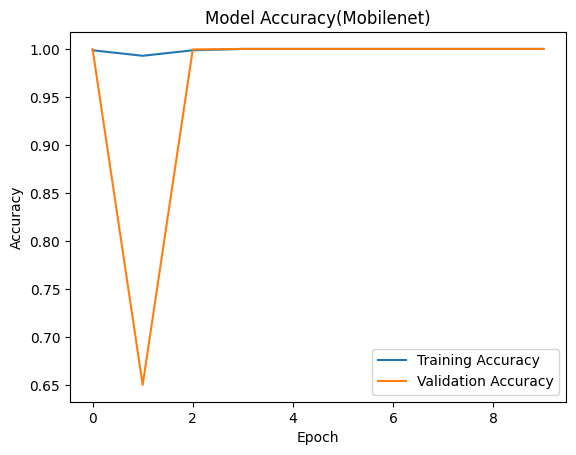

In [19]:
import matplotlib.pyplot as plt

# Train the MobileNet model
history = model_mobilenet_aug.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy(Mobilenet)')
plt.legend()
plt.show()


Evaluation metrics of MobileNet model with data augmentation
Modified MobileNet Model with Data Augmentation - Loss: 0.8767202496528625, Accuracy: 0.8933333158493042
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Precision: 0.8737678644025393
Recall: 0.8666666666666667
F1-Score: 0.8677655041507023


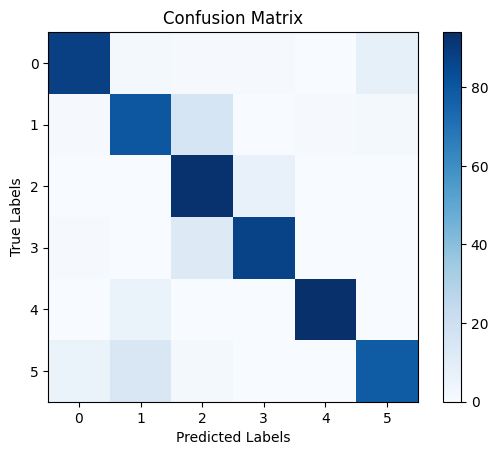

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

print("Evaluation metrics of MobileNet model with data augmentation")
print(f"Modified MobileNet Model with Data Augmentation - Loss: {loss_mobilenet_aug}, Accuracy: {accuracy_mobilenet_aug}")

# 1. Precision, Recall, and F1-Score
y_pred = model_mobilenet_aug.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()